# 연도별출생인구비교분석

- 국가통계포털 https://kosis.kr
- 월.분기.연간 인구동향(출생,사망,혼인,이혼) 검색
- 행정구역별 전국제외/ 종류 출생아수 / 년도 선택 1997 ~ 2024년 (울산광역시와 세종시연관해서)
- 행렬전환 선택
- 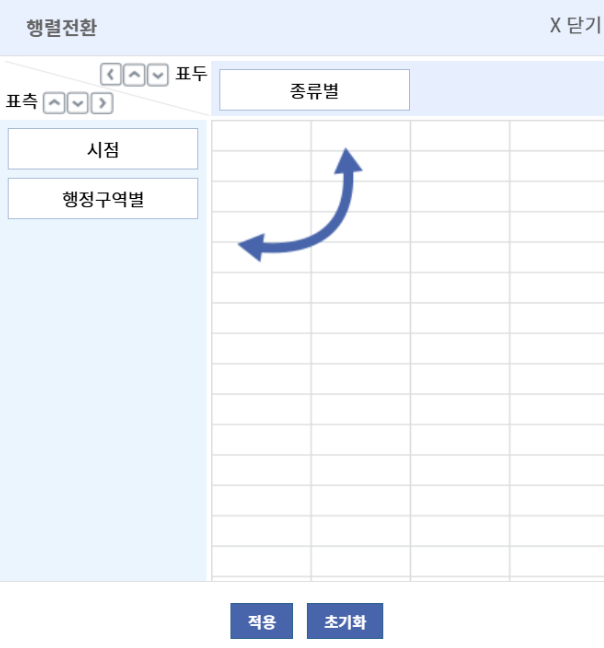

In [1]:
!hostname -I

172.17.0.2 172.19.0.6 


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime
from hdfs import InsecureClient

In [3]:
# 차트 스타일 설정
plt.style.use('fivethirtyeight')

# D2Coding 폰트
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2Coding'
# 마이너스 부호가 깨지지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# 하둡에서 데이터 임포트
client_hdfs = InsecureClient('http://namenode:9870', user='hadoop')
path = '/user/hadoop/인구동향출생2023.csv'
with client_hdfs.read(path, encoding='euc-kr') as reader:
    data = pd.read_csv(reader)
data

,시점,행정구역별(1),출생아수(명)
0,1997,서울특별시,142724
1,1997,부산광역시,46284
2,1997,대구광역시,35219
3,1997,인천광역시,38103
4,1997,광주광역시,21684
...,...,...,...
454,2023,전북특별자치도,6622
455,2023,전라남도,7828
456,2023,경상북도,10186
457,2023,경상남도,13049


In [5]:
ex1_data = data.copy()
ex1_data.columns = ["year","region","value"]
ex1_data['value'] = ex1_data['value'].astype(str).replace('-','0').astype(int)
# 1997년 이후만 선택
# ex1_data = ex1_data[ex1_data['year']>=1997]
ex1_data.head(3)

,year,region,value
0,1997,서울특별시,142724
1,1997,부산광역시,46284
2,1997,대구광역시,35219


In [6]:
# 연도별 출생 인구비율 비교차트 그리기 , 지역과 출생연도를 기준으로 인구수를 정리
ex1_data = ex1_data.groupby(['region','year'], as_index=False)['value'].sum()
ex1_data.head(3)

,region,year,value
0,강원특별자치도,1997,19821
1,강원특별자치도,1998,19421
2,강원특별자치도,1999,19143


In [27]:
# 'value' 열을 지역별로 백분율로 전환
# 각 지역별로 'value' 열의 값을 합산 후, 각 값에 대해 전체 합계 대비 백분율을 계산
ex1_data['value'] = ex1_data.groupby(['region'])['value'].apply(lambda x: 100 * x/ float(x.sum())).reset_index(drop=True)
# 결측값 제거
ex1_data = ex1_data.dropna() # 결측값을 제거

print(ex1_data.head(15))

     region  year     value
0   강원특별자치도  1997  5.896370
1   강원특별자치도  1998  5.777377
2   강원특별자치도  1999  5.694677
3   강원특별자치도  2000  5.795524
4   강원특별자치도  2001  5.019396
5   강원특별자치도  2002  4.555623
6   강원특별자치도  2003  4.268554
7   강원특별자치도  2004  4.098097
8   강원특별자치도  2005  3.765216
9   강원특별자치도  2006  3.705125
10  강원특별자치도  2007  4.072514
11  강원특별자치도  2008  3.680732
12  강원특별자치도  2009  3.603089
13  강원특별자치도  2010  3.711670
14  강원특별자치도  2011  3.691143


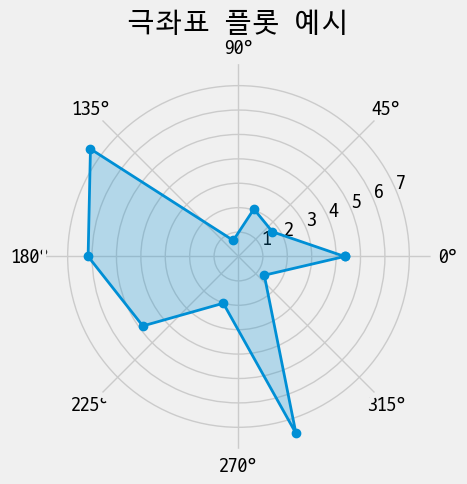

In [28]:
# 극좌표 플롯
# 데이터 생성
angles = np.linspace(0,2*np.pi ,10, endpoint=False)
radii = np.random.rand(10)*10

# 첫 번째 값을 마지막에 추가하여 원형 플롯완성
angles = np.concatenate((angles,[angles[0]]))
radii =  np.concatenate((radii,[radii[0]]))

# 극좌표 플롯 생성
fig, ax = plt.subplots(subplot_kw = dict(polar=True))
ax.plot(angles, radii, 'o-', linewidth=2)

# 배경채우기
ax.fill(angles, radii, alpha= 0.25)
# 플롯 제목 설정
ax.set_title("극좌표 플롯 예시", size=20)

plt.show()

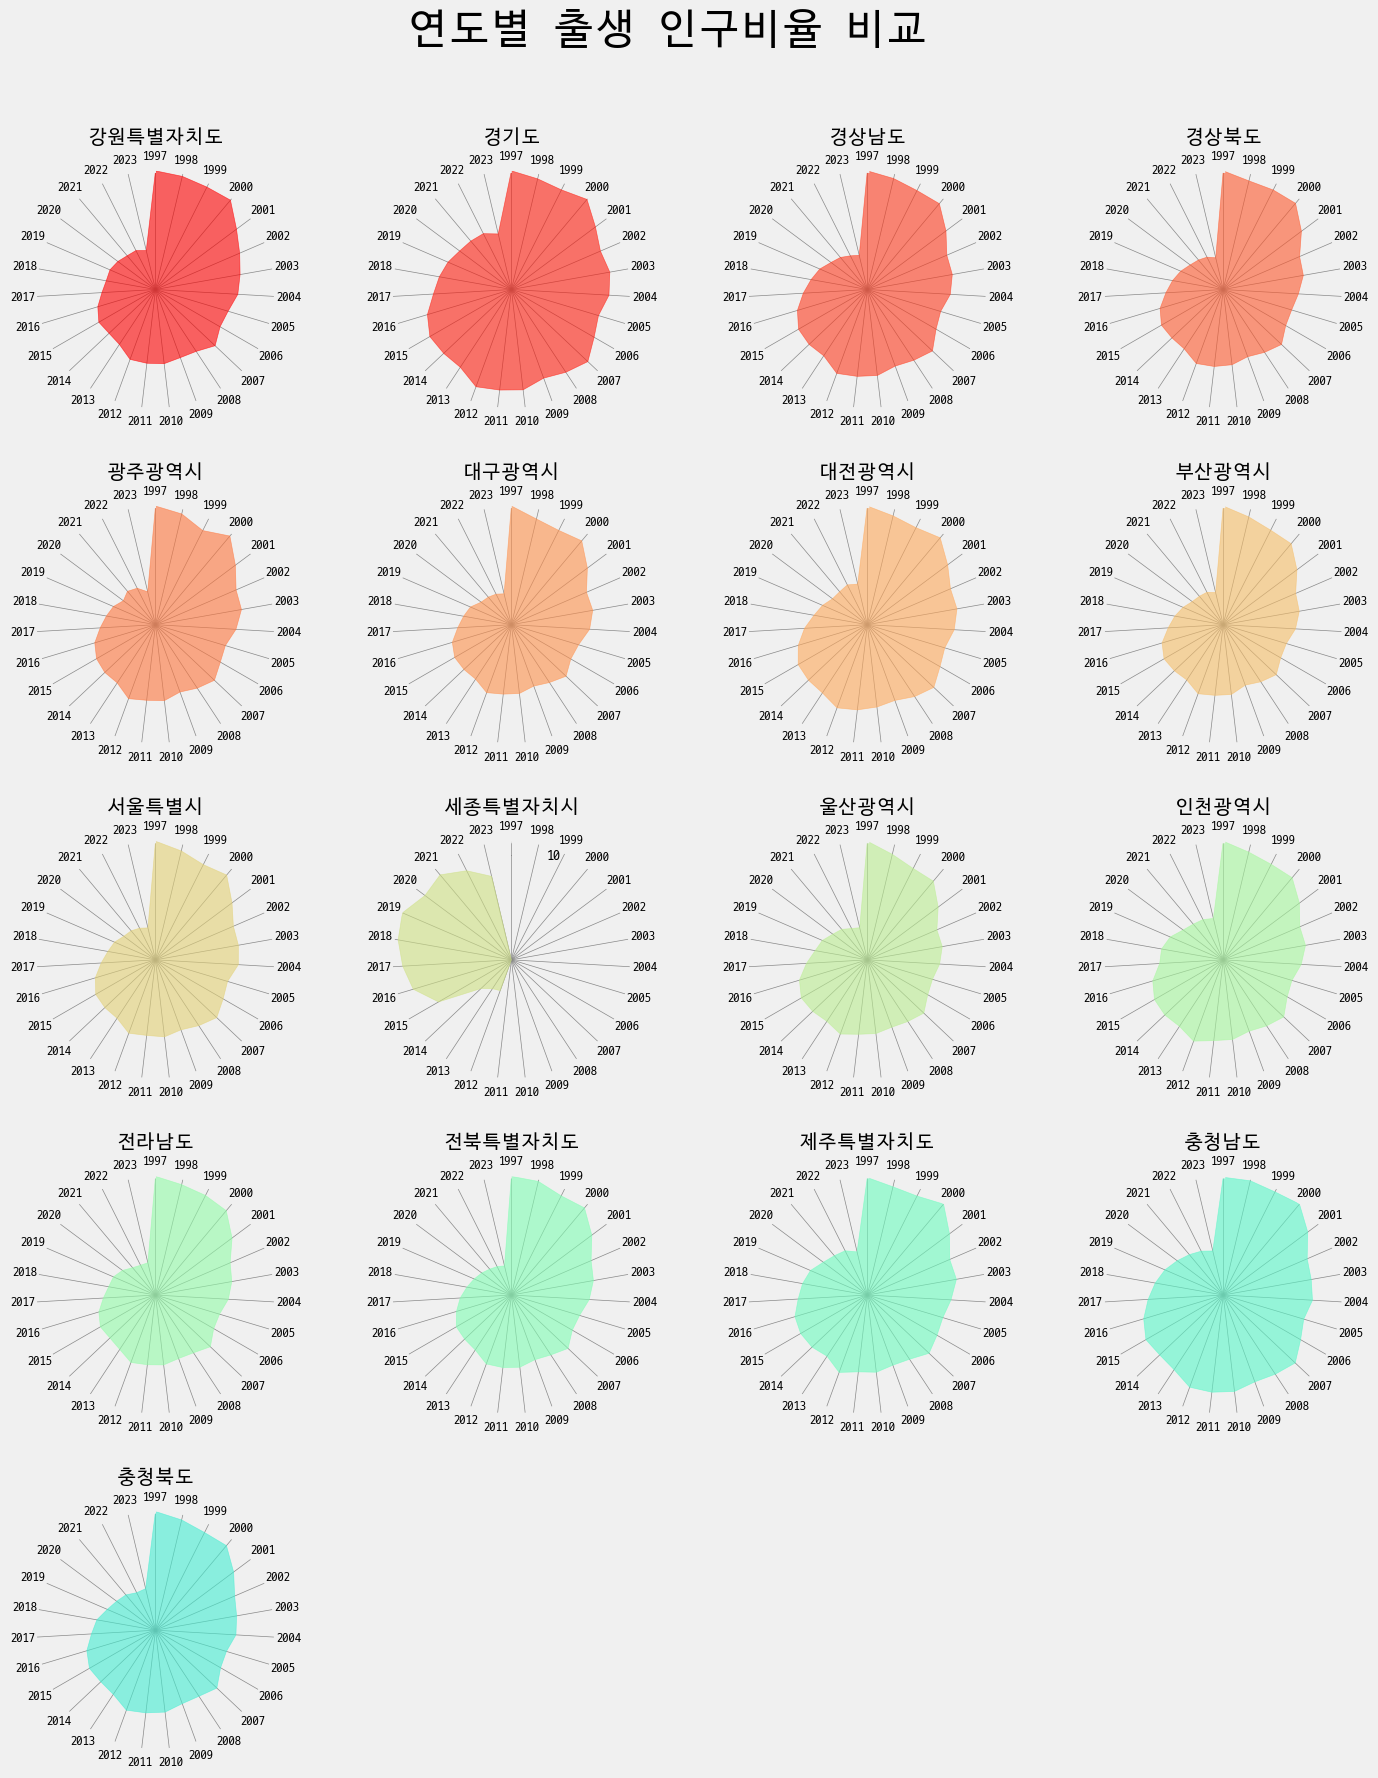

In [38]:
pi = 3.141592
fig, axe = plt.subplots(5, 4 , figsize=(15,20), subplot_kw = dict(polar=True))

#서브플롯을 1차원 배열 형태로 변환
axs = axe.flat

# 고유한 년도 리스트 생성
year_list = list(ex1_data['year'].unique())

# 지역별로 색상 설정
colors = [plt.cm.rainbow(a) for a in np.linspace(1.0 ,0.0 , len(year_list))]

# 서브플록 인덱스 초기화
i = 0

for region, value in ex1_data.groupby('region'):
    # 각 지역의 값 리스트 생성
    val = list(value['value'])
    ex1_plot_data = val.copy()
    ex1_plot_data += ex1_plot_data[:1] # 마지막값을 처음값으로 넣기
    # 각 값에 대한 각도 계산
    angles = [n / float(len(val)) * 2 * pi for n in range(len(val))]
    angles += angle[:1] # 마지막값을 처음값으로 넣기 즉, 값 닫기

    # 서브플롯 설정
    axs[i].set_theta_offset(pi/2)  # 0도를 위쪽으로 설정
    axs[i].set_theta_direction(-1)  # 시계 반대 방향으로 각도 증가
    axs[i].set_rlabel_position(20)  # 반지름 레이블 위치 설정
    axs[i].xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)  # x축 그리드 설정
    axs[i].yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)  # y축 그리드 설정
    axs[i].set_rgrids([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize=10)  # 반지름 그리드 설정
    axs[i].set_xticks(angles[:-1])  # x축 틱 설정
    axs[i].xaxis.set_ticklabels(list(year_list), fontsize=9)  # x축 틱 레이블 설정
    axs[i].set_ylim(0, max(val))  # y축 범위 설정

    # 선 그리기
    axs[i].plot(angles, ex1_plot_data, linewidth=0, linestyle='solid', zorder=3)

    # 배경 채우기
    axs[i].fill(angles, ex1_plot_data, color=colors[i], alpha=0.6)

    # 서브플롯 제목 설정
    axs[i].set_title(region, fontsize=14, position=(0.5, 1.1))    
    i += 1

# 데이터 없는 서브플롯 숨기기
for j in range(i, len(axs)):
    fig.delaxes(axs[j])

# 전체 플롯 제목을 설정
fig.suptitle("연도별 출생 인구비율 비교",fontsize=30, y=0.95)
# 서브플롯 간의 간격 조정
fig.subplots_adjust(wspace=0.5)
# 플롯을 그림파일로 저장
plt.savefig('연도별출생인구비율.png')
plt.show()